In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import pycaret
from pycaret.classification import *
%matplotlib inline

In [2]:
# lendo a base de dados
df = pd.read_csv('/content/drive/MyDrive/machine learning/dataset/titanic.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S


In [3]:
df.drop(columns=["PassengerId", "Name","Ticket","Cabin"], inplace=True)

In [4]:
setup = setup(data=df, target="Survived")
  # ele faz o preprocessamento também

,Description,Value
0,Session id,1466
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,2


In [7]:
eda(display_format= 'bokeh')

Output hidden; open in https://colab.research.google.com to view.

In [9]:
import plotly.express as px
fig = px.box(df, y="Fare")
fig.show()

Basicamente ele vai fazer uma comparação entre todos os modelos, mostrando os valores para metricas

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8332,0.8577,0.7111,0.8307,0.7605,0.6350,0.6439,1.0550
catboost,CatBoost Classifier,0.8252,0.8484,0.6861,0.8267,0.7460,0.6158,0.6245,2.5640
lightgbm,Light Gradient Boosting Machine,0.8171,0.8479,0.7029,0.7978,0.7439,0.6033,0.6090,0.6150
xgboost,Extreme Gradient Boosting,0.8155,0.8409,0.7319,0.7758,0.7525,0.6057,0.6071,0.2770
rf,Random Forest Classifier,0.8124,0.8437,0.7152,0.7767,0.7423,0.5958,0.5989,0.8970
lr,Logistic Regression,0.7867,0.8273,0.6908,0.7389,0.7101,0.5425,0.5462,0.7560
et,Extra Trees Classifier,0.7867,0.8144,0.6817,0.7402,0.7085,0.5409,0.5431,0.6330
dt,Decision Tree Classifier,0.7833,0.7710,0.6861,0.7305,0.7068,0.5354,0.5367,0.1930
ridge,Ridge Classifier,0.7771,0.0000,0.6658,0.7295,0.6932,0.5196,0.5230,0.2710
ada,Ada Boost Classifier,0.7755,0.8189,0.7029,0.7081,0.7043,0.5236,0.5247,0.6940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1466, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
best = compare_models(sort = 'F1') # Faz uma validação cruzada para saber o melhor

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8332,0.8577,0.7111,0.8307,0.7605,0.6350,0.6439,0.2570
xgboost,Extreme Gradient Boosting,0.8155,0.8409,0.7319,0.7758,0.7525,0.6057,0.6071,0.3850
catboost,CatBoost Classifier,0.8252,0.8484,0.6861,0.8267,0.7460,0.6158,0.6245,0.1310
lightgbm,Light Gradient Boosting Machine,0.8171,0.8479,0.7029,0.7978,0.7439,0.6033,0.6090,0.2940
rf,Random Forest Classifier,0.8124,0.8437,0.7152,0.7767,0.7423,0.5958,0.5989,0.6460
lr,Logistic Regression,0.7867,0.8273,0.6908,0.7389,0.7101,0.5425,0.5462,0.3880
et,Extra Trees Classifier,0.7867,0.8144,0.6817,0.7402,0.7085,0.5409,0.5431,0.6880
dt,Decision Tree Classifier,0.7833,0.7710,0.6861,0.7305,0.7068,0.5354,0.5367,0.1720
ada,Ada Boost Classifier,0.7755,0.8189,0.7029,0.7081,0.7043,0.5236,0.5247,0.4020
ridge,Ridge Classifier,0.7771,0.0000,0.6658,0.7295,0.6932,0.5196,0.5230,0.2770


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

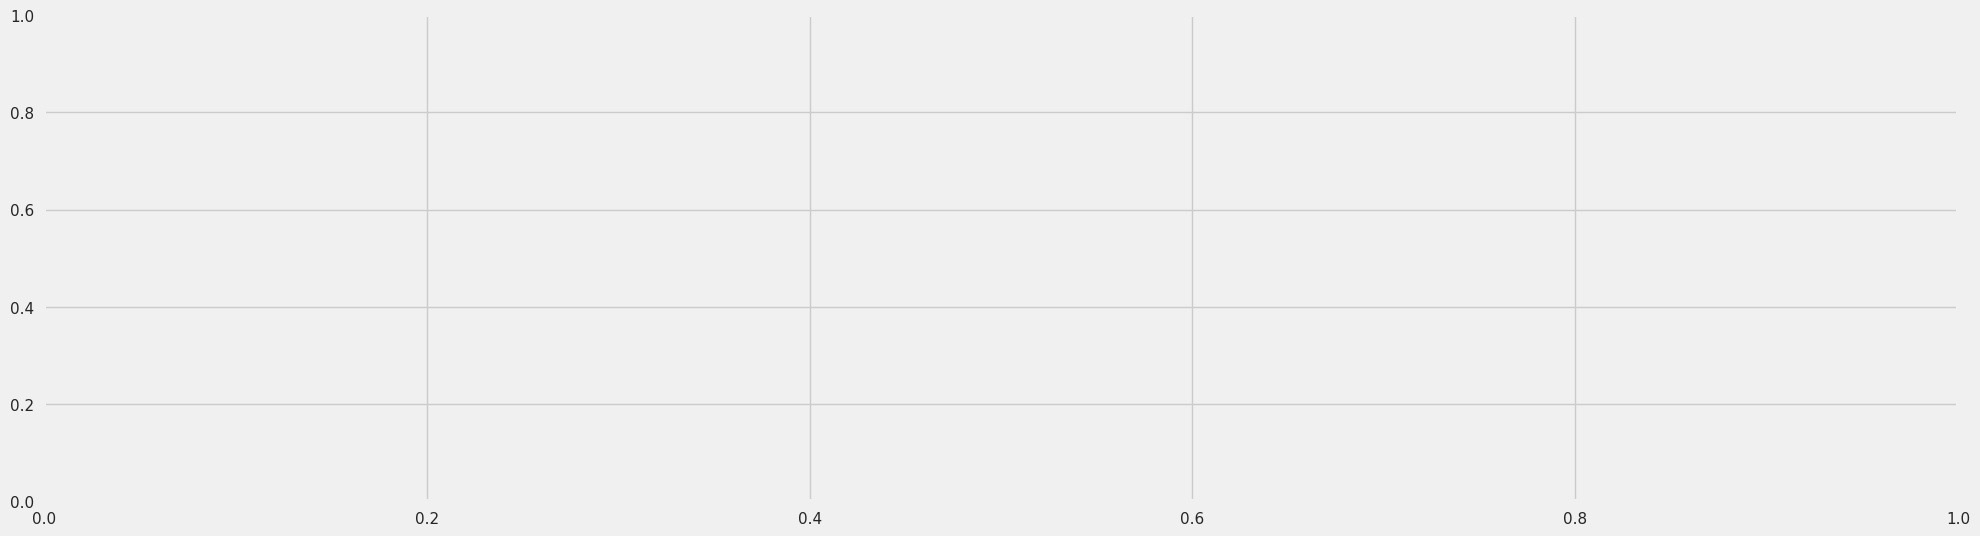

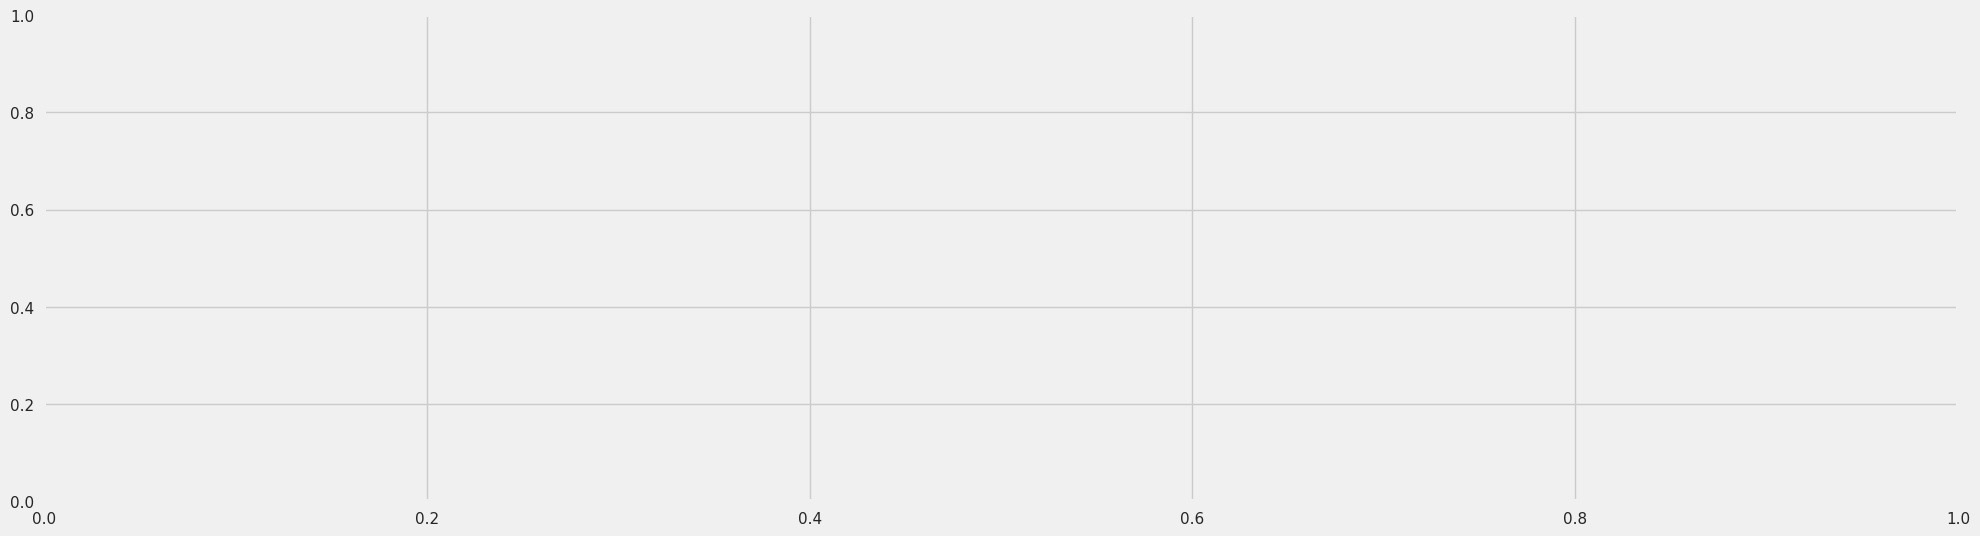

In [12]:
evaluate_model(best)

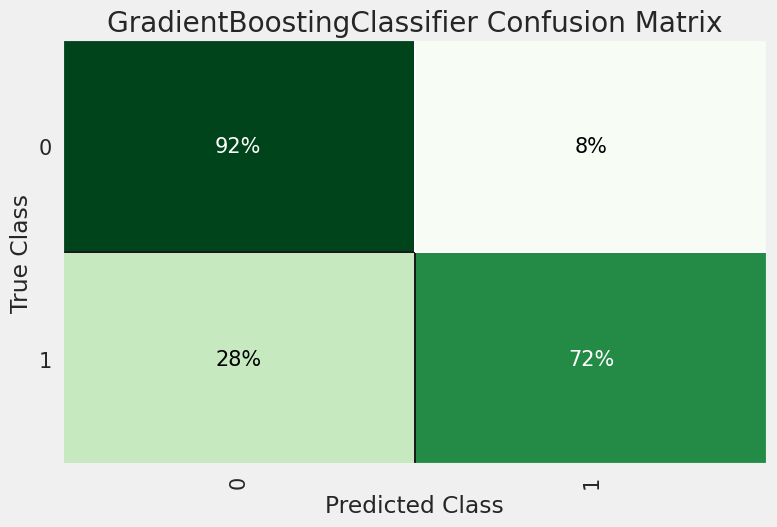

In [14]:
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True}) # plotando a matriz de confusão do melhor modelo

In [16]:
predict_model(best) # Vai mostrar a predição comparada aos resultados reais

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8433,0.8863,0.7184,0.8506,0.7789,0.6589,0.6645


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,prediction_label,prediction_score
633,1,male,NaN,0,0,0.000000,S,0,0,0.8897
157,3,male,30.0,0,0,8.050000,S,0,0,0.8679
674,2,male,NaN,0,0,0.000000,S,0,0,0.9576
201,3,male,NaN,8,2,69.550003,S,0,0,0.9339
314,2,male,43.0,1,1,26.250000,S,0,0,0.8518
...,...,...,...,...,...,...,...,...,...,...
283,3,male,19.0,0,0,8.050000,S,1,0,0.8964
845,3,male,42.0,0,0,7.550000,S,0,0,0.9225
582,2,male,54.0,0,0,26.000000,S,0,0,0.9259
851,3,male,74.0,0,0,7.775000,S,0,0,0.9734


# Vamos criar um array de teste para fazer testes por fora

In [17]:
import numpy as np
import numpy as np
teste = np.array([[2,1,30,0,0,7.2250, "S"]])
teste = pd.DataFrame(teste, columns=["Pclass", "Sex","Age", "SibSp","Parch", "Fare", "Embarked"])

In [18]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
190,1,2,female,32.0,0,0,13.0000,S
408,0,3,male,21.0,0,0,7.7750,S
399,1,2,female,28.0,0,0,12.6500,S
64,0,1,male,NaN,0,0,27.7208,C
832,0,3,male,NaN,0,0,7.2292,C


In [19]:
teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,30,0,0,7.225,S


In [20]:
predict_model(best, data=teste)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,prediction_label,prediction_score
0,2,1,30,0,0,7.225,S,1,0.9297


In [22]:
# melhorando e deixando salvo o best
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.8371,0.7500,0.9474,0.8372,0.7546,0.7665
1,0.8571,0.9306,0.8750,0.7778,0.8235,0.7042,0.7077
2,0.6984,0.7361,0.4167,0.6667,0.5128,0.3109,0.3289
3,0.7903,0.8188,0.6522,0.7500,0.6977,0.5384,0.5415
4,0.8387,0.8893,0.6250,0.9375,0.7500,0.6379,0.6664
5,0.8226,0.8191,0.6250,0.8824,0.7317,0.6049,0.6249
6,0.8387,0.8481,0.7917,0.7917,0.7917,0.6601,0.6601
7,0.8710,0.9342,0.7917,0.8636,0.8261,0.7238,0.7256
8,0.8548,0.9156,0.7917,0.8261,0.8085,0.6917,0.6921


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Tune model

In [23]:
# vai tunar nosso modelo
tuned = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8205,0.7083,0.8095,0.7556,0.6207,0.6240
1,0.9048,0.9701,0.9167,0.8462,0.8800,0.8013,0.8030
2,0.6825,0.7329,0.5000,0.6000,0.5455,0.3046,0.3076
3,0.7742,0.8239,0.6957,0.6957,0.6957,0.5162,0.5162
4,0.7742,0.8306,0.6250,0.7500,0.6818,0.5090,0.5141
5,0.8065,0.8213,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.8226,0.8459,0.7500,0.7826,0.7660,0.6232,0.6236
7,0.8871,0.9397,0.7083,1.0000,0.8293,0.7486,0.7734
8,0.9194,0.9463,0.9167,0.8800,0.8980,0.8313,0.8318


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Plot Model

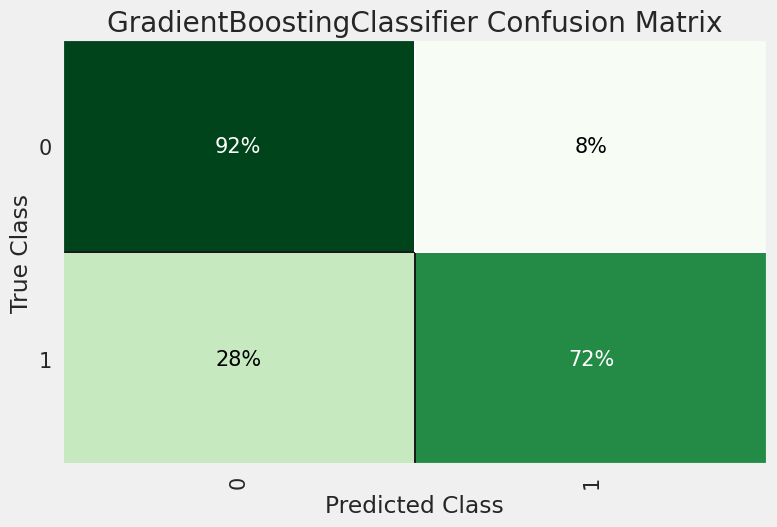

In [24]:
plot_model(gbc, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

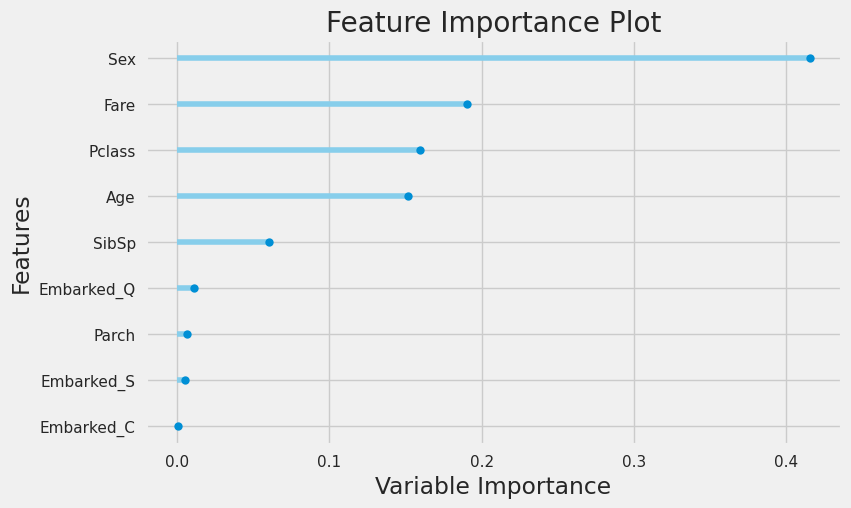

In [26]:
plot_model(gbc, plot="feature")

# Salvando o modelo

In [35]:
save_model(gbc, '/content/drive/MyDrive/machine learning/gbc')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWr...
                                             criterion='friedman_mse

In [40]:
#Carregando o modelo
import joblib

# Carregue o modelo salvo
gbc = joblib.load('/content/drive/MyDrive/machine learning/gbc.pkl')